<a href="https://colab.research.google.com/github/AMJAMAITHILI/FEST-MANAGEMENT-API/blob/main/DAV_Assignment(141).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

=>Step 1: Data Loading & Inspection

In [15]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
print("First 5 rows:")
df.head()

First 5 rows:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42.0,6.0,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60.0,8.0,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60.0,8.0,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30.0,8.0,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30.0,8.0,Obese,140/90,85,3000,Sleep Apnea


In [21]:
print("\nDataset Info:\n")
print(df.info())



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    float64
 7   Stress Level             374 non-null    float64
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 38.1+ KB
None


In [17]:
print("\nMissing Values:\n")
df.isna().sum()


Missing Values:



,0
Person ID,0
Gender,0
Age,0
Occupation,3
Sleep Duration,5
Quality of Sleep,0
Physical Activity Level,6
Stress Level,1
BMI Category,2
Blood Pressure,0


=>Step 2: Clean Data

In [23]:
# Filling missing numerical columns with median
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Filling categorical columns with mode, except 'Sleep Disorder'
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if col == 'Sleep Disorder':
        df[col] = df[col].fillna('No')
    elif df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [25]:
#After handling missing data
print(df.isna().sum())
print("First 5 rows:")
df.head()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64
First 5 rows:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,27,Software Engineer,6.1,6,42.0,6.0,Overweight,126/83,77,4200,No
1,2,0,28,Doctor,6.2,6,60.0,8.0,Normal,125/80,75,10000,No
2,3,0,28,Doctor,6.2,6,60.0,8.0,Normal,125/80,75,10000,No
3,4,0,28,Sales Representative,5.9,4,30.0,8.0,Obese,140/90,85,3000,Sleep Apnea
4,5,0,28,Sales Representative,5.9,4,30.0,8.0,Obese,140/90,85,3000,Sleep Apnea


=>Step 3: Data Analysis Operations

Basic analysis with Numpy and Pandas

In [38]:
ages = df['Age'].values
# 1. Array Slicing
print("\nArray Slicing Examples:")
print("First 5 ages:", ages[:5])
print("Every second age:", ages[::2])
print("Reverse order:", ages[::-1][:5])


Array Slicing Examples:
First 5 ages: [27 28 28 28 28]
Every second age: [27 28 28 29 29 29 29 29 29 29 30 30 30 30 30 30 31 31 31 31 31 31 31 31
 31 32 32 32 32 32 32 32 32 32 33 33 33 33 33 33 34 35 35 35 35 35 35 36
 36 36 36 36 36 37 37 37 37 37 37 37 37 37 37 38 38 38 38 38 38 38 38 38
 38 39 39 39 39 39 39 39 39 40 40 41 41 41 41 41 41 42 42 42 42 43 43 43
 43 43 43 43 43 43 43 43 43 43 43 43 43 43 44 44 44 44 44 44 44 44 44 44
 44 44 44 44 44 45 45 45 45 45 45 45 48 48 49 49 49 49 49 50 50 50 50 50
 50 50 50 50 50 51 51 51 51 52 52 52 52 52 53 53 53 53 53 53 53 53 54 54
 54 54 55 56 57 57 57 57 58 58 58 59 59 59 59 59 59 59 59]
Reverse order: [59 59 59 59 59]


In [39]:
#2. Universal Functions (ufuncs)
print("\nUniversal Functions Examples:")
print("Log of age (add 1 to avoid log(0)):", np.log(ages + 1)[:5])
print("Square root of age:", np.sqrt(ages[:5]))


Universal Functions Examples:
Log of age (add 1 to avoid log(0)): [3.33220451 3.36729583 3.36729583 3.36729583 3.36729583]
Square root of age: [5.19615242 5.29150262 5.29150262 5.29150262 5.29150262]


In [40]:
# 3. Aggregations
print("\nAggregation Examples:")
print("Max age:", np.max(ages))
print("Min stress level:", np.min(df['Stress Level']))
print("Mean sleep quality:", np.mean(df['Quality of Sleep']))


Aggregation Examples:
Max age: 59
Min stress level: 3.0
Mean sleep quality: 7.31283422459893


In [41]:
# 4. Broadcasting
print("\nBroadcasting Example:")
normalized_age = (ages - ages.mean()) / ages.std()
print("First 5 normalized ages (z-score):", normalized_age[:5])


Broadcasting Example:
First 5 normalized ages (z-score): [-1.75309569 -1.63764266 -1.63764266 -1.63764266 -1.63764266]


In [42]:
# 5. Boolean Masking
print("\nBoolean Masking:")
active_sleepers = df[(df['Physical Activity Level'] > 8) & (df['Sleep Duration'] > 7)]
print("Highly active and well-rested people:", active_sleepers.shape[0])


Boolean Masking:
Highly active and well-rested people: 221


In [43]:
# 6. Sorting with argsort
print("\nSorting with argsort:")
age_sorted_indices = np.argsort(ages)
print("Indices of 5 youngest people:", age_sorted_indices[:5])
print("Youngest ages:", ages[age_sorted_indices[:5]])


Sorting with argsort:
Indices of 5 youngest people: [0 1 2 3 4]
Youngest ages: [27 28 28 28 28]


In [44]:
# 7. Partial Sorting
print("\nPartial Sorting (np.partition):")
five_smallest_ages = np.partition(ages, 5)[:5]
print("Five smallest ages (unsorted):", five_smallest_ages)


Partial Sorting (np.partition):
Five smallest ages (unsorted): [27 28 28 28 28]


In [45]:
# 8. Structured Array
print("\nStructured Array Example:")
structured = np.array(list(zip(df['Age'], df['Gender'], df['Sleep Duration'])),
                      dtype=[('Age', 'i4'), ('Gender', 'i4'), ('Sleep', 'f4')])
print("Structured array (first 3 rows):", structured[:3])
# Filtering from structured array
print("People with sleep < 6 hours:", structured[structured['Sleep'] < 6])


Structured Array Example:
Structured array (first 3 rows): [(27, 0, 6.1) (28, 0, 6.2) (28, 0, 6.2)]
People with sleep < 6 hours: [(28, 0, 5.9) (28, 0, 5.9) (28, 0, 5.9) (34, 1, 5.8) (34, 1, 5.8)
 (48, 1, 5.9)]


In [46]:
# 9. Hierarchical Indexing (MultiIndex in Pandas)
print("\nHierarchical Indexing (MultiIndex):")
multi_df = df.set_index(['Occupation', 'Gender'])
print("Sleep duration for Teacher (Female):")
print(multi_df.loc[('Teacher', 1), 'Sleep Duration'])


Hierarchical Indexing (MultiIndex):
Sleep duration for Teacher (Female):
Occupation  Gender
Teacher     1         7.1
            1         7.1
            1         7.2
            1         7.2
            1         7.2
            1         7.2
            1         6.8
            1         6.8
            1         6.7
            1         6.7
            1         6.7
            1         6.6
            1         6.6
            1         6.6
            1         6.6
            1         6.6
            1         6.6
            1         6.6
            1         6.5
            1         6.5
            1         6.5
            1         6.5
            1         6.8
            1         6.8
            1         6.5
            1         6.5
            1         6.5
            1         6.5
            1         6.6
            1         6.6
            1         6.6
            1         6.6
            1         6.6
            1         6.6
            1         6

<ipython-input-46-f25ec6089664>:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(multi_df.loc[('Teacher', 1), 'Sleep Duration'])


In [27]:
print("\nBasic Statistics:")
print("Mean Sleep Duration:", np.mean(df['Sleep Duration']))
print()
print("Median Quality of Sleep:", np.median(df['Quality of Sleep']))
print()
print("Standard Deviation of Physical Activity Level:", np.std(df['Physical Activity Level']))
print()
print(df.describe())


Basic Statistics:
Mean Sleep Duration: 7.132887700534759

Median Quality of Sleep: 7.0

Standard Deviation of Physical Activity Level: 20.66707334006967

        Person ID      Gender         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000  374.000000      374.000000        374.000000   
mean   187.500000    0.494652   42.184492        7.132888          7.312834   
std    108.108742    0.500641    8.673133        0.790061          1.196956   
min      1.000000    0.000000   27.000000        5.800000          4.000000   
25%     94.250000    0.000000   35.250000        6.425000          6.000000   
50%    187.500000    0.000000   43.000000        7.200000          7.000000   
75%    280.750000    1.000000   50.000000        7.800000          8.000000   
max    374.000000    1.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    

In [30]:
# Filter people with high stress
high_stress = df[df['Stress Level'] > 7]
print("\nHigh stress individuals:\n", high_stress[['Age', 'Stress Level']])


High stress individuals:
      Age  Stress Level
1     28           8.0
2     28           8.0
3     28           8.0
4     28           8.0
5     28           8.0
..   ...           ...
296   50           8.0
297   50           8.0
303   51           8.0
304   51           8.0
305   51           8.0

[70 rows x 2 columns]


In [31]:
# Advanced Analysis
# Group by Occupation and average sleep duration
occupation_sleep = df.groupby('Occupation')['Sleep Duration'].mean()
print("\nAverage Sleep Duration by Occupation:\n", occupation_sleep)


Average Sleep Duration by Occupation:
 Occupation
Accountant              7.113514
Doctor                  6.944118
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.075000
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.712500
Name: Sleep Duration, dtype: float64


In [36]:
#pivot tables
pivot_quality = pd.pivot_table(df, values='Quality of Sleep', index='BMI Category', columns='Gender', aggfunc='mean')
print("\nPivot Table - Sleep Quality:")
print()
print(pivot_quality)


Pivot Table - Sleep Quality:

Gender                0         1
BMI Category                     
Normal         7.251908  8.500000
Normal Weight  7.714286  7.285714
Obese          6.333333  7.000000
Overweight     6.095238  7.216981


=>Step 4: Data Visualization

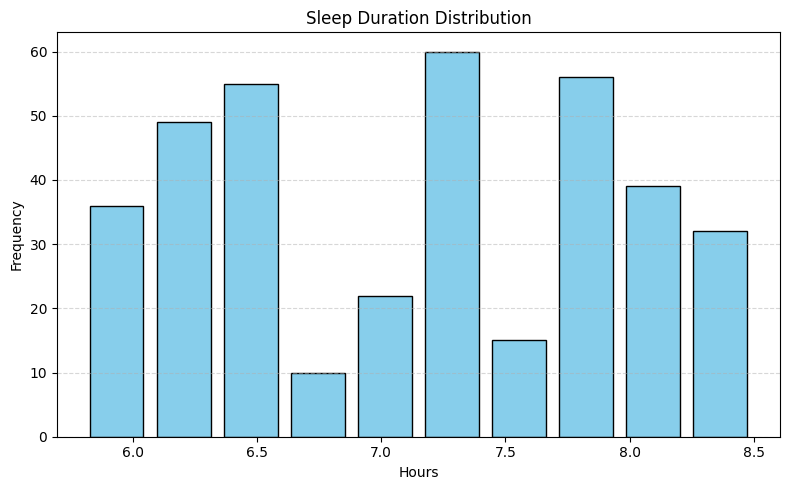

In [49]:
#A. Basic Matplotlib Plots
#B. Seaborn Visualizations
#C. Advanced Seaborn Plot
# Histogram of Sleep Duration
counts, bins = np.histogram(df['Sleep Duration'], bins=10)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, counts, width=(bins[1] - bins[0]) * 0.8, color='skyblue', edgecolor='black')  # 0.8 for spacing
plt.title("Sleep Duration Distribution")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

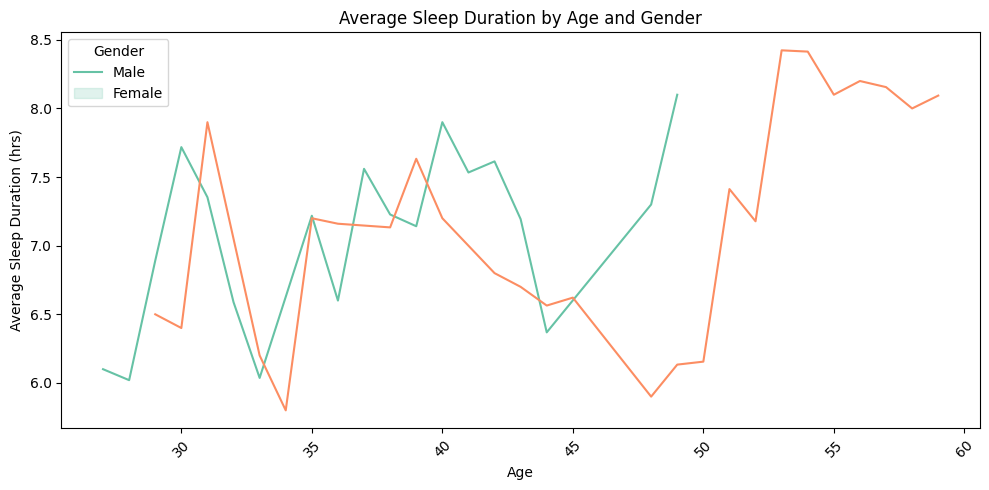

In [58]:
# Line Plot: Average Sleep Duration by Age (separated by Gender)

# Group data: average sleep duration per age for each gender
avg_sleep_by_age_gender = df.groupby(['Age', 'Gender'])['Sleep Duration'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10, 5))
sns.lineplot(x='Age', y='Sleep Duration', hue='Gender', data=avg_sleep_by_age_gender, palette='Set2')
plt.title("Average Sleep Duration by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Average Sleep Duration (hrs)")
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()


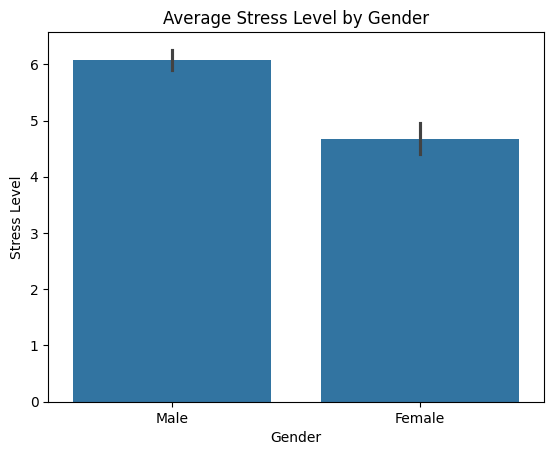

In [51]:
# Bar Plot - Stress Level by Gender
sns.barplot(x='Gender', y='Stress Level', data=df)
plt.title("Average Stress Level by Gender")
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

<Figure size 800x500 with 0 Axes>

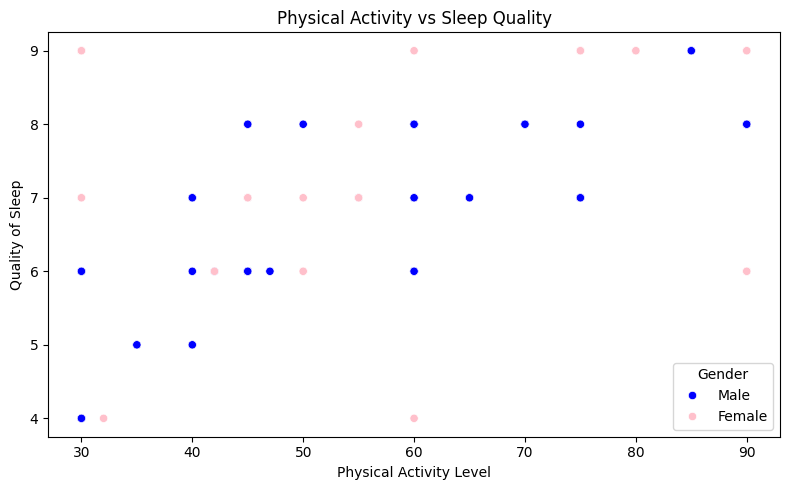

In [54]:
# Scatter Plot - Physical Activity vs Quality of Sleep
plt.figure(figsize=(8, 5))
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Physical Activity Level',
    y='Quality of Sleep',
    hue=df['Gender'].map({0: 'Male', 1: 'Female'}),
    data=df,
    palette={'Male': 'blue', 'Female': 'pink'}
)
plt.title("Physical Activity vs Sleep Quality")
plt.xlabel("Physical Activity Level")
plt.ylabel("Quality of Sleep")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

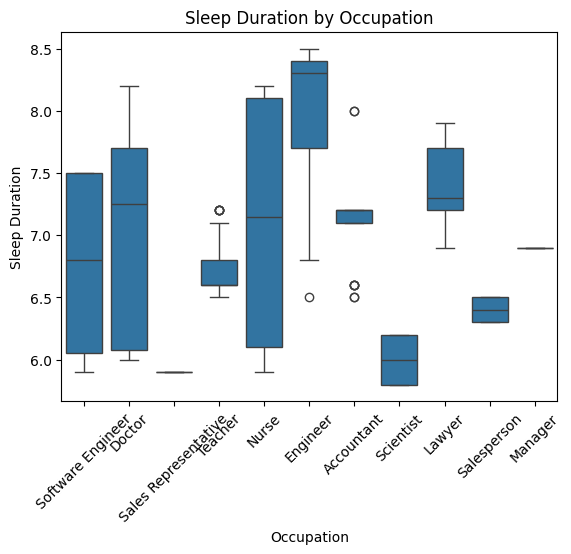

In [55]:
# Boxplot - Sleep Duration by Occupation
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title("Sleep Duration by Occupation")
plt.xticks(rotation=45)
plt.show()

=>Step 5: Advanced NumPy Operations

In [59]:
#Normalize the Age column (Z-score)
age_mean = np.mean(df['Age'])
age_std = np.std(df['Age'])
df['Age_zscore'] = (df['Age'] - age_mean) / age_std

print("First 5 rows with normalized age:")
print(df[['Age', 'Age_zscore']].head())


First 5 rows with normalized age:
   Age  Age_zscore
0   27   -1.753096
1   28   -1.637643
2   28   -1.637643
3   28   -1.637643
4   28   -1.637643


In [63]:
#Boolean Indexing with NumPy: Age 25-35
youngish_adults = df[np.logical_and(ages >= 25, ages <= 35)]
print(f"Number of adults aged 25–35: {len(youngish_adults)}")
print("Sample:")
print(youngish_adults[['Age', 'Gender', 'Occupation', 'Sleep Duration', 'Stress Level']].head())


Number of adults aged 25–35: 94
Sample:
   Age  Gender            Occupation  Sleep Duration  Stress Level
0   27       0     Software Engineer             6.1           6.0
1   28       0                Doctor             6.2           8.0
2   28       0                Doctor             6.2           8.0
3   28       0  Sales Representative             5.9           8.0
4   28       0  Sales Representative             5.9           8.0


In [65]:
# New Column: Sleep Efficiency (hypothetical formula)
df['Sleep_Efficiency'] = df['Sleep Duration'] - df['Stress Level']

print("New column 'Sleep_Efficiency' added:")
print(df[['Sleep Duration', 'Stress Level', 'Sleep_Efficiency']].head())


New column 'Sleep_Efficiency' added:
   Sleep Duration  Stress Level  Sleep_Efficiency
0             6.1           6.0               0.1
1             6.2           8.0              -1.8
2             6.2           8.0              -1.8
3             5.9           8.0              -2.1
4             5.9           8.0              -2.1


In [67]:
# Group by Occupation
grouped_stats = df.groupby('Occupation')[['Sleep Duration', 'Stress Level']].mean()

print("Average Sleep Duration and Stress Level by Occupation:")
print(grouped_stats)


Average Sleep Duration and Stress Level by Occupation:
                      Sleep Duration  Stress Level
Occupation                                        
Accountant                  7.113514      4.594595
Doctor                      6.944118      6.750000
Engineer                    7.987302      3.888889
Lawyer                      7.410638      5.063830
Manager                     6.900000      5.000000
Nurse                       7.075000      5.565789
Sales Representative        5.900000      8.000000
Salesperson                 6.403125      7.000000
Scientist                   6.000000      7.000000
Software Engineer           6.750000      6.000000
Teacher                     6.712500      4.525000


In [68]:
#Merging Two Datasets
df_sleep = df[['Person ID', 'Sleep Duration', 'Quality of Sleep']]
df_health = df[['Person ID', 'Stress Level', 'Physical Activity Level']]

# Merge on 'Person ID'
merged_df = pd.merge(df_sleep, df_health, on='Person ID')

print("Merged Data Sample:")
print(merged_df.head())


Merged Data Sample:
   Person ID  Sleep Duration  Quality of Sleep  Stress Level  \
0          1             6.1                 6           6.0   
1          2             6.2                 6           8.0   
2          3             6.2                 6           8.0   
3          4             5.9                 4           8.0   
4          5             5.9                 4           8.0   

   Physical Activity Level  
0                     42.0  
1                     60.0  
2                     60.0  
3                     30.0  
4                     30.0  


In [69]:
#Pivot Table
#Pivot Table 1: Average Sleep Quality per BMI Category
pivot1 = pd.pivot_table(df, index='BMI Category', values='Quality of Sleep', aggfunc='mean')
print("Pivot Table 1 - Sleep Quality by BMI Category:")
print(pivot1)

Pivot Table 1 - Sleep Quality by BMI Category:
               Quality of Sleep
BMI Category                   
Normal                 7.661538
Normal Weight          7.428571
Obese                  6.400000
Overweight             6.898649


In [ ]:
#Pivot Table 2: Mean Sleep Duration per Occupation and Gender
pivot2 = pd.pivot_table(df, index='Occupation', columns='Gender', values='Sleep Duration', aggfunc='mean')
print("Pivot Table 2 - Sleep Duration by Occupation and Gender:")
print(pivot2)

In [71]:
#Pivot Table 3: Average Stress Level by Age and Gender
pivot3 = pd.pivot_table(df, index='Age', columns='Gender', values='Stress Level', aggfunc='mean')
print("Pivot Table 3 - Average Stress Level by Age and Gender:")
print(pivot3)

Pivot Table 3 - Average Stress Level by Age and Gender:
Gender         0         1
Age                       
27      6.000000       NaN
28      8.000000       NaN
29      7.181818  7.000000
30      6.000000  7.000000
31      6.294118  4.000000
32      6.941176       NaN
33      8.000000  6.000000
34           NaN  8.000000
35      4.454545  4.000000
36      7.000000  4.000000
37      4.600000  4.133333
38      5.000000  4.111111
39      5.166667  4.000000
40      5.000000  6.000000
41      5.250000       NaN
42      5.285714  7.000000
43      5.870968  4.000000
44      7.000000  4.000000
45           NaN  4.357143
48      5.000000  8.000000
49      3.000000  8.000000
50           NaN  7.750000
51           NaN  5.250000
52           NaN  5.666667
53           NaN  3.000000
54           NaN  3.000000
55           NaN  4.000000
56           NaN  3.000000
57           NaN  3.000000
58           NaN  3.000000
59           NaN  3.000000


In [74]:
# Equivalent to pivot1 using groupby
grouped_bmi = df.groupby('BMI Category')['Quality of Sleep'].mean()
print("GroupBy Comparison - Sleep Quality by BMI Category:")
print(grouped_bmi)
print()
# Equivalent to pivot2 using groupby + unstack
grouped_occ_gender = df.groupby(['Occupation', 'Gender'])['Sleep Duration'].mean().unstack()
print("GroupBy Comparison - Sleep Duration by Occupation and Gender:")
print(grouped_occ_gender)


GroupBy Comparison - Sleep Quality by BMI Category:
BMI Category
Normal           7.661538
Normal Weight    7.428571
Obese            6.400000
Overweight       6.898649
Name: Quality of Sleep, dtype: float64

GroupBy Comparison - Sleep Duration by Occupation and Gender:
Gender                       0         1
Occupation                              
Accountant            7.200000  7.111111
Doctor                6.906061  8.200000
Engineer              7.535484  8.425000
Lawyer                7.422222  7.150000
Manager                    NaN  6.900000
Nurse                 7.366667  7.063014
Sales Representative  5.900000       NaN
Salesperson           6.403125       NaN
Scientist                  NaN  6.000000
Software Engineer     6.750000       NaN
Teacher               6.760000  6.705714
